In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import scipy
import sklearn
import sklearn.datasets
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial

tfd = tfp.distributions
psd_kernels = tfp.positive_semidefinite_kernels

/home/peter/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/peter/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/peter/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/peter/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
from linear import Linear

# Linear kernel
amplitude_linear = tf.math.softplus(tf.Variable(np.float64(0)), name='amplitude_linear')
bias_linear = tf.math.softplus(tf.Variable(np.float64(0)), name='bias_linear')
origin_linear = tf.Variable(np.zeros((3), dtype=np.float64), name='origin_linear')
kernel_linear = Linear(
    amplitude=amplitude_linear,
    bias=bias_linear,
    origin=origin_linear)
# print('kernel_linear: ', kernel_linear)
print('kernel_linear.batch_shape: ', kernel_linear.batch_shape)

kernel_linear_batch_shape = kernel_linear.batch_shape_tensor()
print('kernel_linear_batch_shape: ', kernel_linear_batch_shape)

x = np.ones([5, 3], np.float64)
y = np.ones([4, 3], np.float64)
print('x: ', x.shape)
print('y: ', y.shape)
x1 = tf.convert_to_tensor(x, name='x1')
x2 = tf.convert_to_tensor(y, name='x2')
print('x1: ', x1.shape)
print('x2: ', x2.shape)

m = kernel_linear.matrix(x, y)
print('m: ', type(m), m.dtype, m.shape)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
m_eval = sess.run(m)
print(m_eval)
sess.close()

dtype:  <class 'numpy.float64'>
self.origin:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (3,)
self.bias:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> ()
self.amplitude:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> ()
kernel_linear.batch_shape:  (3,)
kernel_linear_batch_shape:  Tensor("Linear/batch_shape:0", shape=(1,), dtype=int32)
x:  (5, 3)
y:  (4, 3)
x1:  (5, 3)
x2:  (4, 3)

Linear._apply
x1:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (5, 1, 3)
x2:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (1, 4, 3)
x1:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (5, 1, 3)
x2:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (1, 4, 3)
x2.T:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (3, 4, 1)
dot_prod:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (5, 4)
dot_prod:  <class 'tensorflow

X:  (100, 1)
zero:  (1, 1)
dtype:  <class 'numpy.float64'>
self.origin:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> ()
self.bias:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> ()
self.amplitude:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> ()

Linear._apply
x1:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (100, 1)
x2:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (1, 1)
x1:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (100, 1)
x2:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (1, 1)
x2.T:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (1, 1)
dot_prod:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (100, 1)
dot_prod:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (100, 1)
dot_prod:  <class 'tensorflow.python.framework.ops.Tensor'> <dtype: 'float64'> (100, 1)


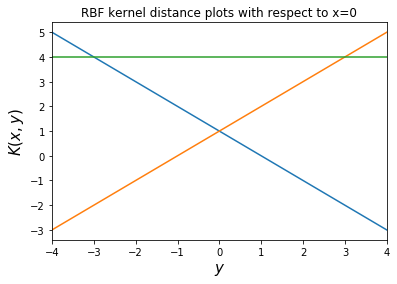

In [6]:
sess = tf.InteractiveSession()

# Plot some kernel values of y with respect to 0
X = np.expand_dims(np.linspace(-4, 4, num=100), 1)
print('X: ', X.shape)
zero = np.array([[0.]])
print('zero: ', zero.shape)
# y1 = linear_kernel(zero, X, b=0, c=1)
kernel_linear = Linear(
    amplitude=tf.convert_to_tensor(1., dtype=tf.float64),
    bias=tf.convert_to_tensor(0., dtype=tf.float64),
    origin=tf.convert_to_tensor(1., dtype=tf.float64),)
y1 = sess.run(kernel_linear.apply(X, zero))
print('y1: ', type(y1), y1.shape)
# y2 = linear_kernel(zero, X, b=0, c=-1)
kernel_linear = Linear(
    amplitude=tf.convert_to_tensor(1., dtype=tf.float64),
    bias=tf.convert_to_tensor(0., dtype=tf.float64),
    origin=tf.convert_to_tensor(-1., dtype=tf.float64),)
y2 = sess.run(kernel_linear.apply(X, zero))
print('y2: ', type(y2), y2.shape)
# y3 = linear_kernel(zero, X, b=2, c=0)
kernel_linear = Linear(
    amplitude=tf.convert_to_tensor(1., dtype=tf.float64),
    bias=tf.convert_to_tensor(2., dtype=tf.float64),
    origin=tf.convert_to_tensor(0., dtype=tf.float64),)
y3 = sess.run(kernel_linear.apply(X, zero))
print('y3: ', type(y3), y3.shape)
# # Make the plots
plt.plot(X[:,0], y1[:,0])
plt.plot(X[:,0], y2[:,0])
plt.plot(X[:,0], y3[:,0])
# plt.plot((0, 0), (0, 1), 'k-')
plt.xlabel('$y$', fontsize=15)
plt.ylabel('$K(x,y)$', fontsize=15)
plt.title('RBF kernel distance plots with respect to x=0')
# plt.ylim([0, 1.1])
plt.xlim([-4, 4])
# plt.legend(loc=1)
plt.show()
#

sess.close()

In [4]:
sess.close()

In [5]:
# [[[[1.67219414]
#    [1.67219414]
#    [1.67219414]
#    [1.67219414]]]


#  [[[1.67219414]
#    [1.67219414]
#    [1.67219414]
#    [1.67219414]]]


#  [[[1.67219414]
#    [1.67219414]
#    [1.67219414]
#    [1.67219414]]]


#  [[[1.67219414]
#    [1.67219414]
#    [1.67219414]
#    [1.67219414]]]


#  [[[1.67219414]
#    [1.67219414]
#    [1.67219414]
#    [1.67219414]]]]